In [1]:
#import macroparameters

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import plotly.express as px

    
import os, sys, shutil


def print_all_df(df):
    # Permanently changes the pandas settings
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', -1)
    
    # All dataframes hereafter reflect these changes.
    display(df)
    
    print('**RESET_OPTIONS**')
    
    # Resets the options
    pd.reset_option('all')
    

# Define Prefix of which experiment to analyse

In [2]:
prefix = "ALTE004"

In [3]:
# navigate into tidy_data_files and make a list of all files

os.chdir('/app/data/tidy_data_files')
os.getcwd()

items = os.listdir(".")

# lists all .csv
csv_list = []
for names in items:
    if names.endswith(".csv"):
        csv_list.append(names)
print(csv_list)



['ALTE001_tidy_data.csv', 'ALTE002_tidy_data.csv', 'ALTE003_tidy_data.csv', 'ALTE004_tidy_data.csv']


In [4]:
# import the correct tidy dataset

print(os.getcwd())

# make file name
dataset = prefix +'_tidy_data.csv'

# import into pandas DF
all_gain_data = pd.read_csv(dataset, header=0)

# change back to /src for neatness
os.chdir('/app')

/app/data/tidy_data_files


In [5]:
# get the individual products
product_list = all_gain_data['Expression Product'].unique()
product_list

array(['GFP'], dtype=object)

# Plot all replicates for both gain settings

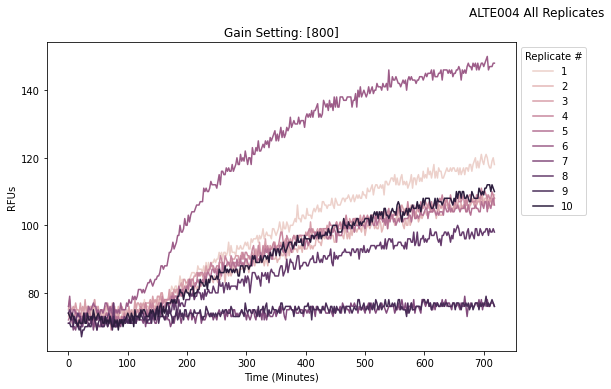

In [6]:
fig = plt.figure(figsize=(15,10))

plot_counter = 1

for i, product in enumerate(product_list):
    
    #just get the individual product
    product_subsection = all_gain_data[all_gain_data['Expression Product'] == product]
    
    # get individual gain values of product subsection
    gain_list = product_subsection['Gain Setting'].unique()
    
    for i, gain in enumerate(gain_list):
        

        
        #just get the individual gain of the product slice
        
        gain_subsection = product_subsection[product_subsection['Gain Setting'] == gain]
        
        
        # get individual gain

        ax = plt.subplot(2, 2, plot_counter)

        sns.lineplot(data = gain_subsection,
                x = 'Time (Minutes)',
                y = 'RFUs',
                hue = 'Replicate',
                legend='full',
                ax=ax)

        ax.legend(title="Replicate #", loc = 2, bbox_to_anchor = (1,1))
        ax.set(title="Gain Setting: " + str(gain_subsection['Gain Setting'].unique()))
        
        plot_counter += 1


#fig.text(0.001, 0.65, 'Malachite Green', ha='center', rotation="vertical")
#fig.text(0.001, 0.25, 'GFP', ha='center', rotation="vertical")


fig.suptitle(prefix+ " All Replicates")
fig.tight_layout()




##### Save fig


path = "/app/data/plots/"

# make directory for sticking the output in
if os.path.isdir(path) == False:
    os.mkdir(path, mode=0o777)
    
    
#navigate to tidy_data_files
os.chdir(path)

plt.savefig(prefix+"_all_replicates.png")


#navigate home for neatness
os.chdir('/app')



plt.show()



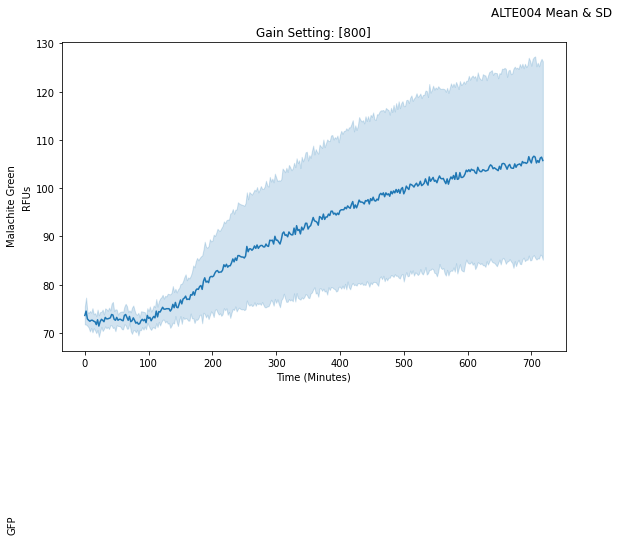

In [7]:
fig = plt.figure(figsize=(15,10))

plot_counter = 1

for i, product in enumerate(product_list):
    
    #just get the individual product
    product_subsection = all_gain_data[all_gain_data['Expression Product'] == product]
    
    # get individual gain values of product subsection
    gain_list = product_subsection['Gain Setting'].unique()
    
    for i, gain in enumerate(gain_list):
        

        
        #just get the individual gain of the product slice
        
        gain_subsection = product_subsection[product_subsection['Gain Setting'] == gain]
        
        
        # get individual gain

        ax = plt.subplot(2, 2, plot_counter)

        sns.lineplot(data = gain_subsection,
                x = 'Time (Minutes)',
                y = 'RFUs',
                ci = 'sd',
                legend='full',
                ax=ax)

        ax.set(title="Gain Setting: " + str(gain_subsection['Gain Setting'].unique()))
        
        plot_counter += 1

fig.text(0.001, 0.65, 'Malachite Green', ha='center', rotation="vertical")
fig.text(0.001, 0.25, 'GFP', ha='center', rotation="vertical")

fig.suptitle(prefix+ " Mean & SD")
fig.tight_layout()



##### Save fig


path = "/app/data/plots/"

# make directory for sticking the output in
if os.path.isdir(path) == False:
    os.mkdir(path, mode=0o777)
    
    
#navigate to tidy_data_files
os.chdir(path)

plt.savefig(prefix+"_mean_sd.png")


#navigate home for neatness
os.chdir('/app')

plt.show()


In [8]:
GFP = all_gain_data[all_gain_data["Expression Product"] == "GFP"]
all_gain_data

timepoint = GFP[GFP["Time (Minutes)"] == 700]

timepoint = timepoint[timepoint['Gain Setting'] == 800]
timepoint

Well   Sample ID  Time (Minutes)  RFUs  Gain Setting Chromatic Settings  \
3500  J03   Sample X1             700   118           800            485_520   
3501  J05   Sample X2             700   106           800            485_520   
3502  J07   Sample X3             700   106           800            485_520   
3503  J09   Sample X4             700   110           800            485_520   
3504  J11   Sample X5             700   105           800            485_520   
3505  J13   Sample X6             700   147           800            485_520   
3506  J15   Sample X7             700    77           800            485_520   
3507  J17   Sample X8             700    98           800            485_520   
3508  J19   Sample X9             700    76           800            485_520   
3509  J21  Sample X10             700   109           800            485_520   

     Expression Product Amplicon DNA Template Energy Solution Reaction Type  \
3500                GFP         s70_deGFP_MGA  Michael_ES_001          TXTL   
3501                GFP         s70_deGFP_MGA  Michael_ES_001          TXTL   
3502                GFP         s70_deGFP_MGA  Michael_ES_001          TXTL   
3503                GFP         s70_deGFP_MGA  Michael_ES_001          TXTL   
3504                GFP         s70_deGFP_MGA  Michael_ES_001          TXTL   
3505                GFP         s70_deGFP_MGA  Michael_ES_001          TXTL   
3506                GFP         s70_deGFP_MGA  Michael_ES_001          TXTL   
3507                GFP         s70_deGFP_MGA  Michael_ES_001          TXTL   
3508                GFP         s70_deGFP_MGA  Michael_ES_001          TXTL   
3509                GFP         s70_deGFP_MGA  Michael_ES_001          TXTL   

      ...  lysate_aspirate_height_inc substrates_aspirate_height_init  \
3500  ...                         0.4                             8.6   
3501  ...                         0.4                             8.6   
3502  ...                         0.4                             8.6   
3503  ...                         0.4                             8.6   
3504  ...                         0.4                             8.6   
3505  ...                         0.4                             8.6   
3506  ...                         0.4                             8.6   
3507  ...                         0.4                             8.6   
3508  ...                         0.4                             8.6   
3509  ...                         0.4                             8.6   

      substrates_aspirate_height_inc wax_dispense_volume wax_dispense_height  \
3500                             0.4                  35                  -3   
3501                             0.4                  35                  -3   
3502                             0.4                  35                  -3   
3503                             0.4                  35                  -3   
3504                             0.4                  35                  -3   
3505                             0.4                  35                  -3   
3506                             0.4                  35                  -3   
3507                             0.4                  35                  -3   
3508                             0.4                  35                  -3   
3509                             0.4                  35                  -3   

      wax_new_tip  wax_touch_tip  wax_air_gap  wax_disposal_volume  Assay Date  
3500        never          False           20                   30  2022-07-06  
3501        never          False           20                   30  2022-07-06  
3502        never          False           20                   30  2022-07-06  
3503        never          False           20                   30  2022-07-06  
3504        never          False           20                   30  2022-07-06  
3505        never          False           20                   30  2022-07-06  
35

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

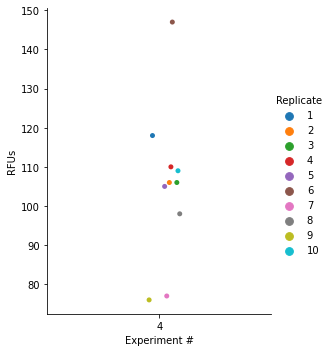

In [9]:
fig = plt.figure(figsize=(10,5))

ax1 = sns.catplot(
            data = timepoint,
            x = "Experiment #",
            y = "RFUs",
            hue="Replicate",
            ax=ax,
            height=5,
            aspect=.8)

ax1 = sns.boxplot(
            data=timepoint,
            x="Experiment #",
            y="RFUs",
            ax=ax,
            whis=np.inf)


fig.suptitle(prefix+ " Scatter Plot")
fig.tight_layout()


##### Save fig


path = "/app/data/plots/"

# make directory for sticking the output in
if os.path.isdir(path) == False:
    os.mkdir(path, mode=0o777)
    
    
#navigate to tidy_data_files
os.chdir(path)

plt.savefig(prefix+"_vertical_scatter_plot.png")


#navigate home for neatness
os.chdir('/app')

plt.show()


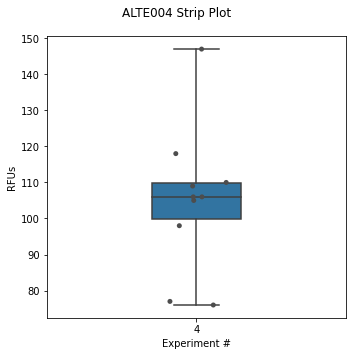

In [10]:
fig = plt.figure(figsize=(5,5))

ax = sns.boxplot(x="Experiment #", y="RFUs", data=timepoint, whis=np.inf, width=0.3)
ax = sns.stripplot(x="Experiment #", y="RFUs", data=timepoint, color=".3")

fig.suptitle(prefix+ " Strip Plot")
fig.tight_layout()


##### Save fig


path = "/app/data/plots/"

# make directory for sticking the output in
if os.path.isdir(path) == False:
    os.mkdir(path, mode=0o777)
    
    
#navigate to tidy_data_files
os.chdir(path)

plt.savefig(prefix+"_box_strip_plot.png.png")


#navigate home for neatness
os.chdir('/app')

plt.show()